# Imports

In [4]:
# bibliotecas que serão usadas ao longo do notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy import stats
from IPython.core.display import HTML

## Funções de Auxílio

In [5]:
# função dos parâmetros do gráfico
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Carregando os dados 

In [6]:
dados_raw = pd.read_csv('Dados/houses_to_rent_v2.csv')
dados_raw.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Descrição dos dados

In [7]:
# copiando os dados
dados1 = dados_raw.copy()

## Renomeando as colunas

In [8]:
dados1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [9]:
# renomeando as colunas
dados1.columns = ['cidade', 'area', 'quartos', 'banheiros', 
                  'numero_vagas', 'andar', 'aceita_animais', 'mobilhada',
                  'valor_condominio(R$)', 'valor_aluguel_(R$)', 'iptu_(R$)', 
                  'taxa_incendio_(R$)', 'valor_total_(R$)']

In [10]:
dados1.columns

Index(['cidade', 'area', 'quartos', 'banheiros', 'numero_vagas', 'andar',
       'aceita_animais', 'mobilhada', 'valor_condominio(R$)',
       'valor_aluguel_(R$)', 'iptu_(R$)', 'taxa_incendio_(R$)',
       'valor_total_(R$)'],
      dtype='object')

### Dicionário dos dados

* **cidade**: Cidade onde a residência está situada.
* **area**: Área do imóvel em metros quadrados.
* **quartos**: Número de quartos.
* **banheiros**: Número de banheiros.
* **numero_vagas**: Número de vagas de estacionamento.
* **andar**: Andar que a residência está situada.
* **aceita_animais**: Indicador se aceita ou não animais.
* **mobilhada**: Indicador se a casa é ou não mobilhada.
* **valor_condominio_(R\$)**: Valor do condomínio
* **valor_aluguel_(R\$)**: Valor do aluguel da residência.
* **iptu_(R\$)**: Valor do IPTU da residência.
* **taxa_incendio_(R$)**: Valor da taxa de incêndio paga ao corpo de bombeiros.
* **valor_total_(R\$)**: Valor de todos os valores somados

## Dimensões dos dados

In [11]:
print(f'Número de linhas: {dados1.shape[0]}')
print(f'Número de colunas: {dados1.shape[1]}')

Número de linhas: 10692
Número de colunas: 13


## Tipos de dados

In [12]:
dados1.dtypes

cidade                  object
area                     int64
quartos                  int64
banheiros                int64
numero_vagas             int64
andar                   object
aceita_animais          object
mobilhada               object
valor_condominio(R$)     int64
valor_aluguel_(R$)       int64
iptu_(R$)                int64
taxa_incendio_(R$)       int64
valor_total_(R$)         int64
dtype: object

## Checando valores ausentes

In [13]:
dados1.isna().sum()

cidade                  0
area                    0
quartos                 0
banheiros               0
numero_vagas            0
andar                   0
aceita_animais          0
mobilhada               0
valor_condominio(R$)    0
valor_aluguel_(R$)      0
iptu_(R$)               0
taxa_incendio_(R$)      0
valor_total_(R$)        0
dtype: int64

## Estatística Descritiva

In [14]:
dados1['mobilhada'] = dados1['mobilhada'].replace(['furnished', 'not furnished'],
                                                  ['Sim', 'Não'])
dados1['aceita_animais'] = dados1['aceita_animais'].replace(['acept', 'not acept'],
                                                            ['Sim', 'Não'])

In [15]:
atributos_numericos = dados1.select_dtypes(include=['int64'])
atributos_categoricos = dados1.select_dtypes(exclude=['int64'])

### Atributos Numéricos

In [16]:
# métricas de tendência central
media = pd.DataFrame(atributos_numericos.apply(np.mean)).T # média
mediana = pd.DataFrame(atributos_numericos.apply(np.median)).T # mediana

# métricas de dispersão
std = pd.DataFrame(atributos_numericos.apply(np.std)).T # desvio-padrão
minimo = pd.DataFrame(atributos_numericos.apply(min)).T # valor mínimo
maximo = pd.DataFrame(atributos_numericos.apply(max)).T # valor máximo
range_ = pd.DataFrame(atributos_numericos.apply(lambda x: x.max() - x.min())).T # range
assimetria = pd.DataFrame(atributos_numericos.apply(lambda x: x.skew())).T # assimetria
curtose = pd.DataFrame(atributos_numericos.apply(lambda x: x.kurtosis())).T # curtose

# concatenar as métricas
metricas = pd.concat([minimo, maximo, range_, media, mediana, std, assimetria,
                      curtose]).T.reset_index()

# nomear as colunas dos atributos concatenados
metricas.columns = ['Atributos', 'Mínimo', 'Máximo', 'Range', 'Média', 'Mediana', 'Desvio-Padrão',
                    'Assimetria', 'Curtose']
metricas

,Atributos,Mínimo,Máximo,Range,Média,Mediana,Desvio-Padrão,Assimetria,Curtose
0,area,11.0,46335.0,46324.0,149.217920,90.0,536.991829,69.596804,5548.308334
1,quartos,1.0,13.0,12.0,2.506079,2.0,1.171211,0.702391,1.487659
2,banheiros,1.0,10.0,9.0,2.236813,2.0,1.407132,1.213810,1.134852
3,numero_vagas,0.0,12.0,12.0,1.609147,1.0,1.589446,1.487534,2.769075
4,valor_condominio(R$),0.0,1117000.0,1117000.0,1174.021698,560.0,15591.576074,69.039381,4912.249106
5,valor_aluguel_(R$),450.0,45000.0,44550.0,3896.247194,2661.0,3408.386117,1.838877,4.624228
6,iptu_(R$),0.0,313700.0,313700.0,366.704358,125.0,3107.686983,96.013594,9667.782564
7,taxa_incendio_(R$),3.0,677.0,674.0,53.300879,36.0,47.765797,1.970400,5.934963
8,valor_total_(R$),499.0,1120000.0,1119501.0,5490.487000,3581.5,16483.955004,58.960803,3926.019305


### Atributos categóricos

In [17]:
# ver quantas categorias temos por variáveis
atributos_categoricos.apply(lambda x: x.unique().shape[0])

cidade             5
andar             35
aceita_animais     2
mobilhada          2
dtype: int64

<AxesSubplot:xlabel='mobilhada', ylabel='valor_aluguel_(R$)'>

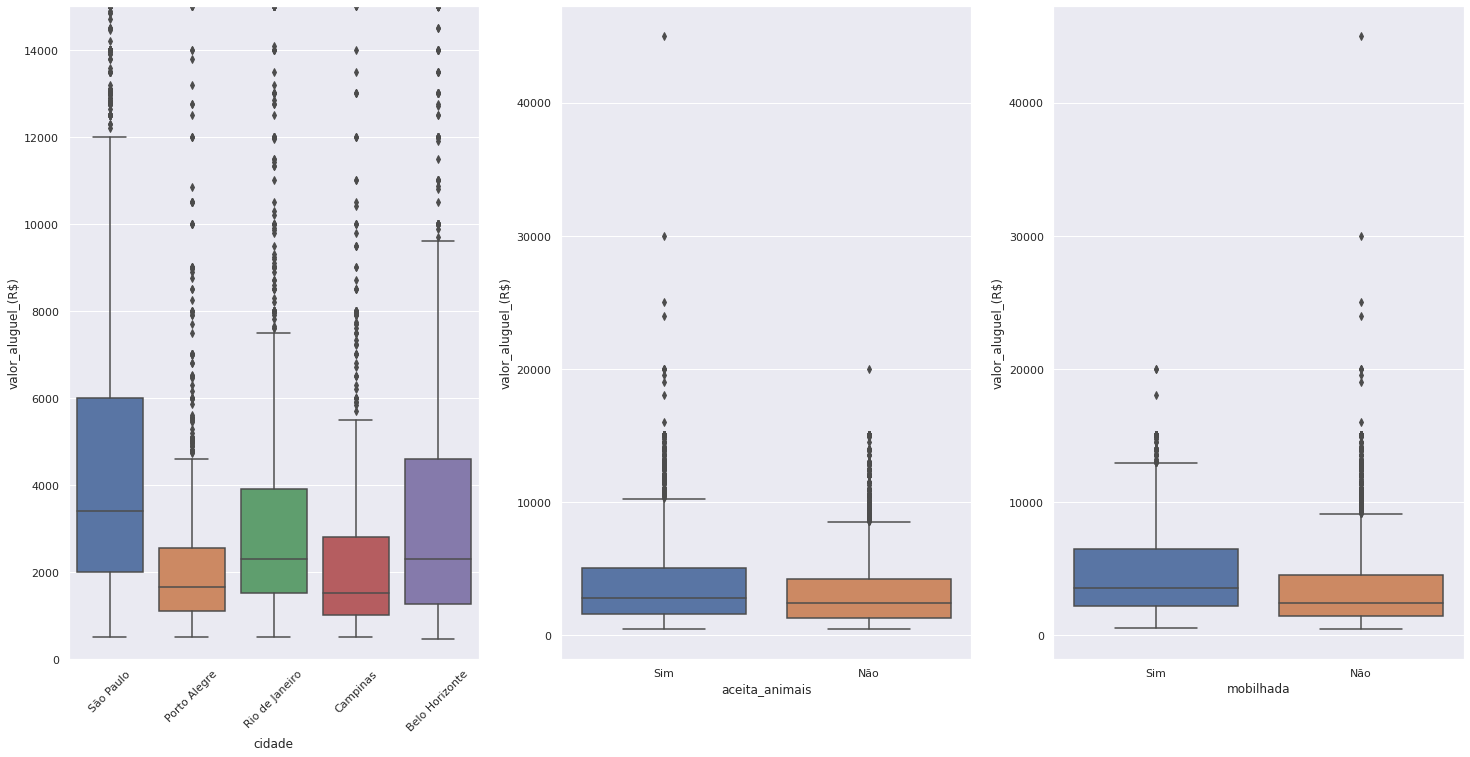

In [18]:
# cidade
plt.subplot(1, 3, 1)
sns.boxplot(x='cidade', y='valor_aluguel_(R$)', data=dados1)
plt.ylim(0, 15000)
plt.xticks(rotation=45);

# aceita_animais
plt.subplot(1, 3, 2)
sns.boxplot(x='aceita_animais', y='valor_aluguel_(R$)', data=dados1)

# mobilhada
plt.subplot(1, 3, 3)
sns.boxplot(x='mobilhada', y='valor_aluguel_(R$)', data=dados1)

In [19]:
dados1.head()

,cidade,area,quartos,banheiros,numero_vagas,andar,aceita_animais,mobilhada,valor_condominio(R$),valor_aluguel_(R$),iptu_(R$),taxa_incendio_(R$),valor_total_(R$)
0,São Paulo,70,2,1,1,7,Sim,Sim,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,Sim,Não,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,Sim,Não,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,Sim,Não,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,Não,Não,0,800,25,11,836


# Filtragem de variáveis

O foco desse estudo será prever apenas o preço do aluguel, então excluiremos de nossos dados as colunas referentes a todos os valores, exceto o preço do aluguel.

In [20]:
dados2 = dados1.copy()

## Seleção das colunas

In [21]:
cols_drop = ['valor_condominio(R$)', 'iptu_(R$)', 'taxa_incendio_(R$)',
             'valor_total_(R$)']
dados2 = dados2.drop(cols_drop, axis=1)
dados2.head()

,cidade,area,quartos,banheiros,numero_vagas,andar,aceita_animais,mobilhada,valor_aluguel_(R$)
0,São Paulo,70,2,1,1,7,Sim,Sim,3300
1,São Paulo,320,4,4,0,20,Sim,Não,4960
2,Porto Alegre,80,1,1,1,6,Sim,Não,2800
3,Porto Alegre,51,2,1,0,2,Sim,Não,1112
4,São Paulo,25,1,1,0,1,Não,Não,800


# Análise exploratória dos dados

In [22]:
dados3 = dados2.copy()

O objetivo da análise exploratória dos dados é verificar como as variáveis impactam o fenômeno, em nosso caso como todas as variáveis impactaram no preço do aluguel. Podemos dividir como os principais objetivos:
1. **Ganhar experiência do dados**: Entendo como eles se relacionam, fica mais fácil gerar decisões acertadas;
2. **Validar hipóteses**: Validar hipóteses criadas nessa fase inicial dos dados.
3. **Perceber variáveis importantes para o modelo**: Isso faz com que a criação do modelo seja mais acertada, evitando erros cometidos por falta de conhecimento do negócio.

A análise exploratória dos dados é dividida em 3 tipos de análises:
1. **Análise univariada**: Como é essa variável?
2. **Análise bivariada**: Como essa variável impacta na variável resposta (preço do aluguel)?
3. **Análise multivariada**: Como as variáveis se relacionam?

## Análise Univariada

### Variável resposta

/home/fhfraga/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_aluguel_(R$)', ylabel='Density'>

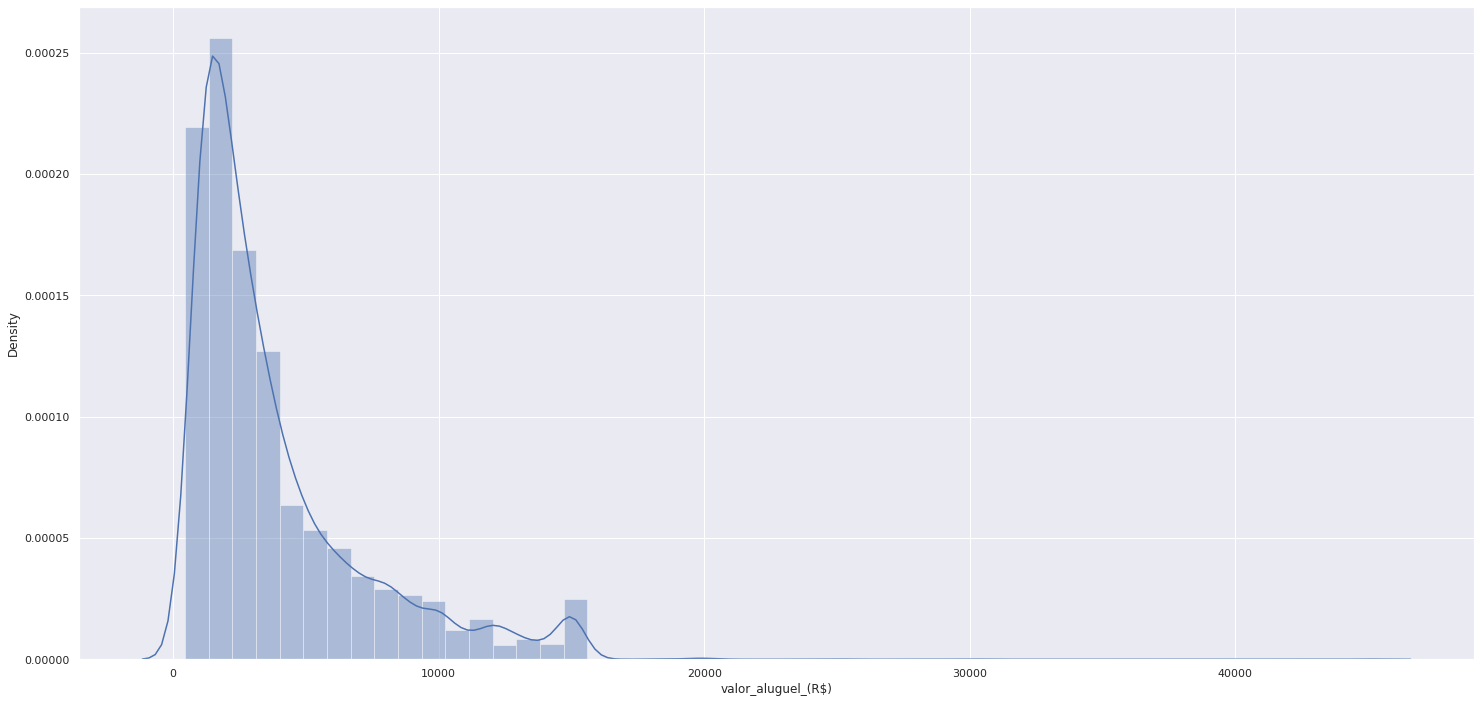

In [23]:
sns.distplot(dados3['valor_aluguel_(R$)'])

### Variável númerica

Como houve exclusão de algumas variáveis, rodarei o código de criação de atributos numericos e categóricos.

In [24]:
atributos_numericos = dados3.select_dtypes(include=['int64'])
atributos_categoricos = dados3.select_dtypes(exclude=['int64'])

In [25]:
atributos_numericos.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
area,70,320,80,51,25,376,72,213,152,35,26,46,36,55,100
quartos,2,4,1,2,1,3,2,4,2,1,1,1,1,1,2
banheiros,1,4,1,1,1,3,1,4,2,1,1,1,1,1,2
numero_vagas,1,0,1,0,0,7,0,4,1,0,0,1,0,1,2
valor_aluguel_(R$),3300,4960,2800,1112,800,8000,1900,3223,15000,2300,2100,580,2100,4200,4370


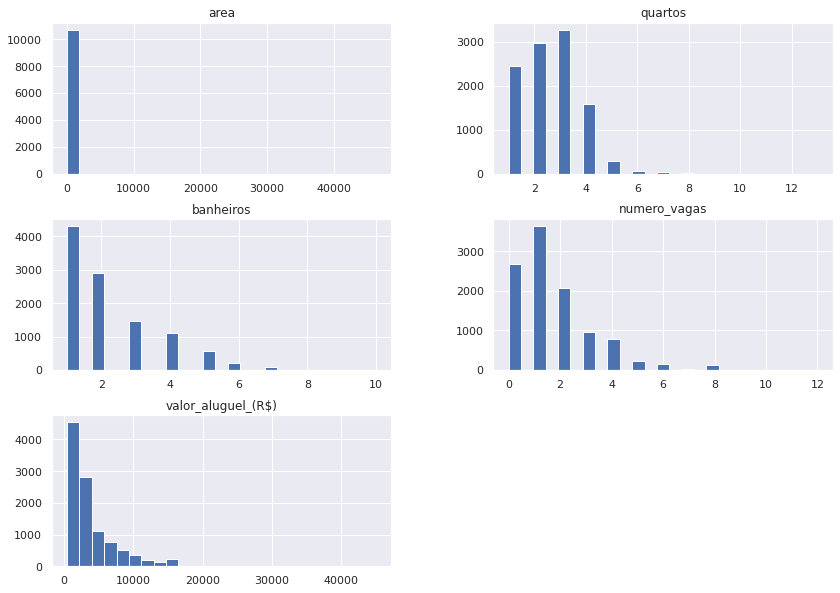

In [26]:
atributos_numericos.hist(bins=25, figsize=(14, 10));

Com a análise univariada chegamos a conclusão que a maioria das residências tem 3 quartos, 1 banheiro, 1 vaga de garagem, os valores de aluguel estão próximos de 0, o que nos indica alugueis baixos.

### Variável categórica

In [27]:
atributos_categoricos.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cidade,São Paulo,São Paulo,Porto Alegre,Porto Alegre,São Paulo,São Paulo,Rio de Janeiro,São Paulo,São Paulo,Rio de Janeiro,São Paulo,Campinas,São Paulo,São Paulo,São Paulo
andar,7,20,6,2,1,-,7,4,3,2,2,10,11,2,24
aceita_animais,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim
mobilhada,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Sim,Sim,Não,Não,Sim,Sim


Vemos que em andar temos alguns valores representados por `-`. Mudaremos esse valor para 0, como representação de que não tem andar, já que predios com andares chamam os andares iniciais de primeiro andar, representado em nossos dados por 1.

In [28]:
dados3['andar'] = dados3['andar'].replace('-', 0)

In [29]:
# atualizando os atributos categóricos
atributos_categoricos = dados3.select_dtypes(exclude=['int64'])

In [30]:
atributos_categoricos.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cidade,São Paulo,São Paulo,Porto Alegre,Porto Alegre,São Paulo,São Paulo,Rio de Janeiro,São Paulo,São Paulo,Rio de Janeiro,São Paulo,Campinas,São Paulo,São Paulo,São Paulo
andar,7,20,6,2,1,0,7,4,3,2,2,10,11,2,24
aceita_animais,Sim,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim
mobilhada,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Sim,Sim,Não,Não,Sim,Sim


/home/fhfraga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/fhfraga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/fhfraga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


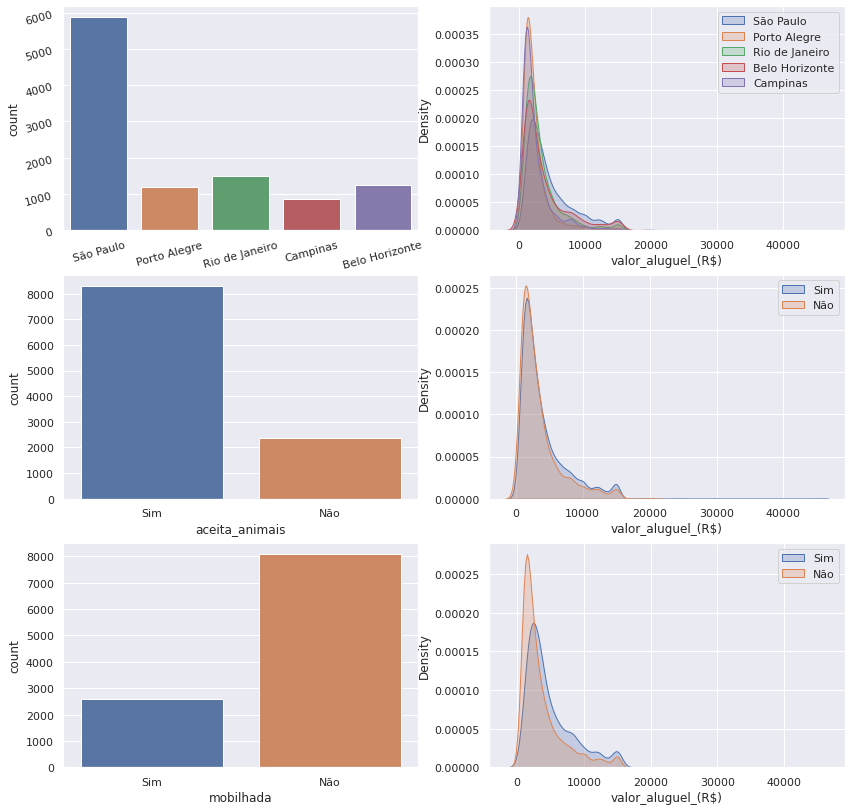

In [31]:
# cidade
fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(3, 2, 1)
sns.countplot(dados3['cidade'], ax=ax1)
ax1.tick_params(rotation=15)

ax2 = fig.add_subplot(3, 2, 2)
sns.kdeplot(dados3[dados3['cidade'] == 'São Paulo']['valor_aluguel_(R$)'],
            label='São Paulo', shade=True, ax=ax2)
sns.kdeplot(dados3[dados3['cidade'] == 'Porto Alegre']['valor_aluguel_(R$)'],
            label='Porto Alegre', shade=True, ax=ax2)
sns.kdeplot(dados3[dados3['cidade'] == 'Rio de Janeiro']['valor_aluguel_(R$)'],
            label='Rio de Janeiro', shade=True, ax=ax2)
sns.kdeplot(dados3[dados3['cidade'] == 'Belo Horizonte']['valor_aluguel_(R$)'],
            label='Belo Horizonte', shade=True, ax=ax2)
sns.kdeplot(dados3[dados3['cidade'] == 'Campinas']['valor_aluguel_(R$)'],
            label='Campinas', shade=True, ax=ax2)
ax2.legend()

# aceita animais
ax3 = fig.add_subplot(3, 2, 3)
sns.countplot(dados3['aceita_animais'], ax=ax3)

ax4 = fig.add_subplot(3, 2, 4)
sns.kdeplot(dados3[dados3['aceita_animais'] == 'Sim']['valor_aluguel_(R$)'],
            label='Sim', shade=True, ax=ax4)
sns.kdeplot(dados3[dados3['aceita_animais'] == 'Não']['valor_aluguel_(R$)'],
            label='Não', shade=True, ax=ax4)

ax4.legend()

# mobilhada
ax5 = fig.add_subplot(3, 2, 5)
sns.countplot(dados3['mobilhada'], ax=ax5)

ax6 = fig.add_subplot(3, 2, 6)
sns.kdeplot(dados3[dados3['mobilhada'] == 'Sim']['valor_aluguel_(R$)'],
            label='Sim', shade=True, ax=ax6)
sns.kdeplot(dados3[dados3['mobilhada'] == 'Não']['valor_aluguel_(R$)'],
            label='Não', shade=True, ax=ax6)

ax6.legend()

A visualização dos dados de `andar` não foram mostradas, pois está variável possui diversos valores distintos, gerando uma visualização confusa.

## Análise Bivariada

Na análise bivariada veremos como as variáveis impactam na variável resposta. Para isso criaremos hipóteses, que serão testadas. As hipóteses serão.
1. Residências com áreas maiores são mais caras
2. Residências com mais quartos são mais caras
3. Residências com maior quantidade de banheiro são mais caras
4. Residências com maior número de vagas para estacionamento são mais caras
5. Residências mobilhadas são mais caras

Nos ateremos a essas 5 hipóteses no momento. Vamos responder cada uma

### H1. Residências com áreas maiores são mais caras

In [32]:
# vendo a área média
dados3['area'].mean()

149.21791994014217

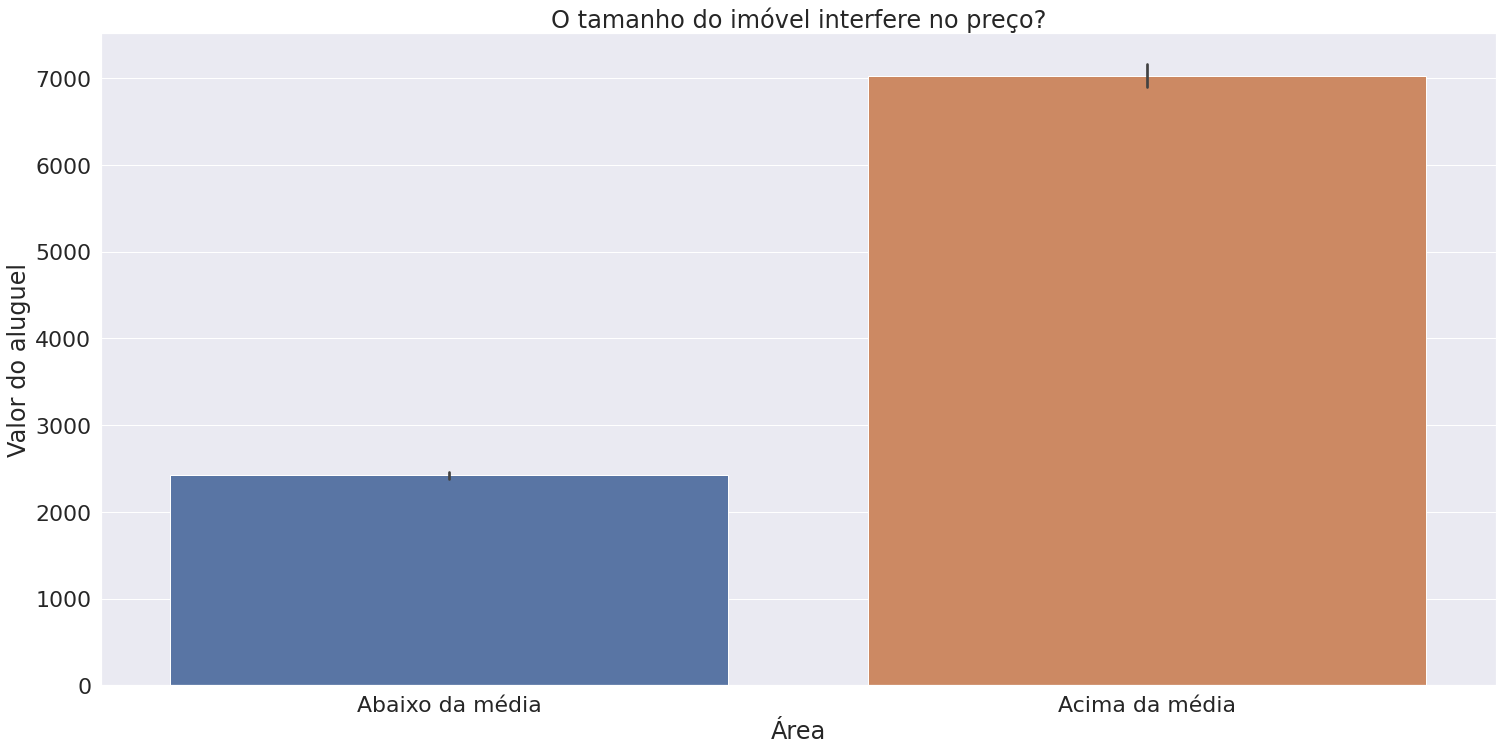

In [33]:
dados3['area_categoria'] = dados3['area'].apply(lambda x: 1 if x > 149 else 0) 
dados3 ['area_categoria'] = dados3['area_categoria'].replace({0: 'Abaixo da média', 1: 'Acima da média'})
sns.set(font_scale=2)
sns.barplot(x='area_categoria', y='valor_aluguel_(R$)', data=dados3)
plt.xlabel('Área', fontsize=24)
plt.ylabel('Valor do aluguel', fontsize=24)
plt.title('O tamanho do imóvel interfere no preço?');

Vemos que essa hipótese é verdadeira, pois residência com áreas maiores tem o aluguel mais caro.

### H2. Residências com mais quartos são mais caras

<AxesSubplot:xlabel='quartos', ylabel='valor_aluguel_(R$)'>

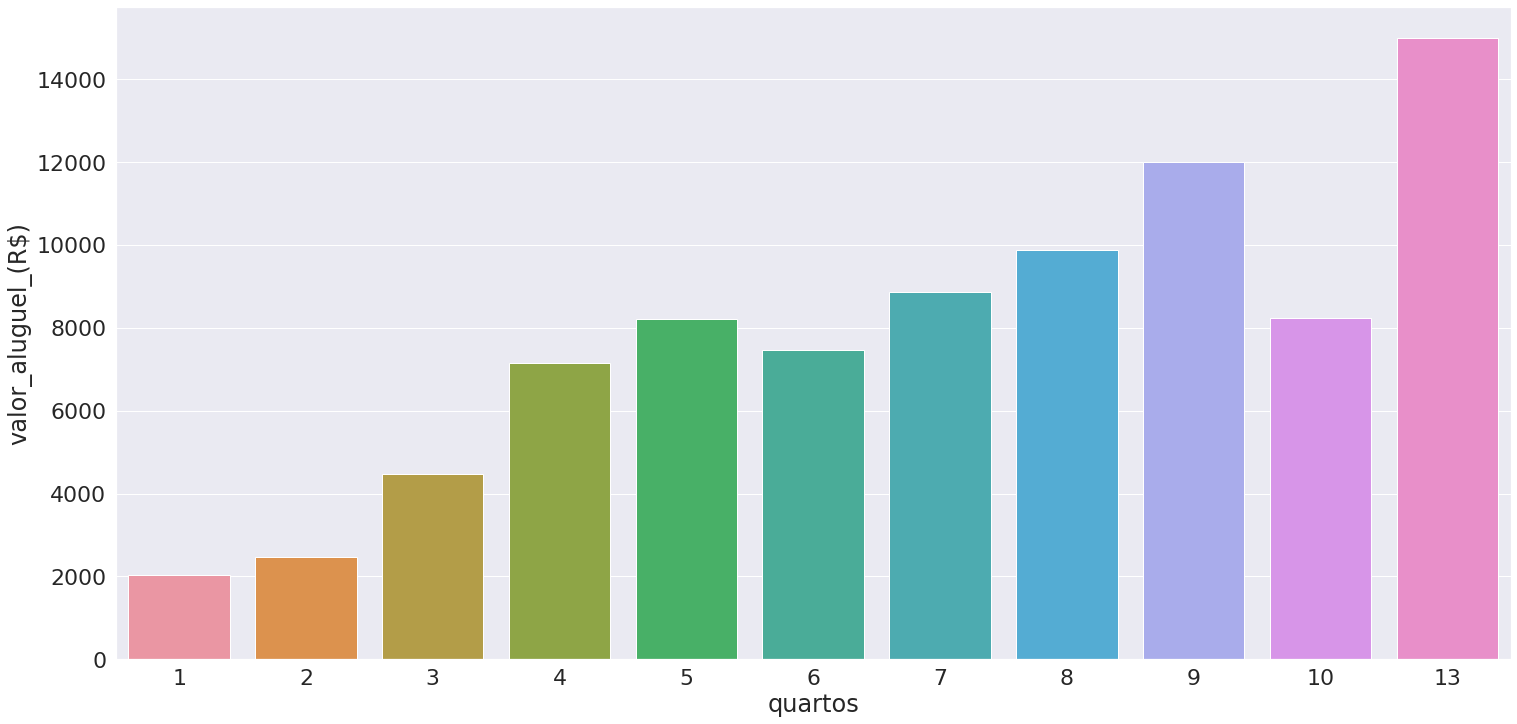

In [34]:
aux1_h2 = dados3[['quartos', 'valor_aluguel_(R$)']].groupby('quartos').mean().reset_index()
sns.barplot(x='quartos', y='valor_aluguel_(R$)', data=aux1_h2)

Vemos que aqui também a hipótese é verdadeira, pois residências com mais quartos possui maiores alugueis.

### H3. Residências com maior quantidade de banheiro são mais caras

<AxesSubplot:xlabel='banheiros', ylabel='valor_aluguel_(R$)'>

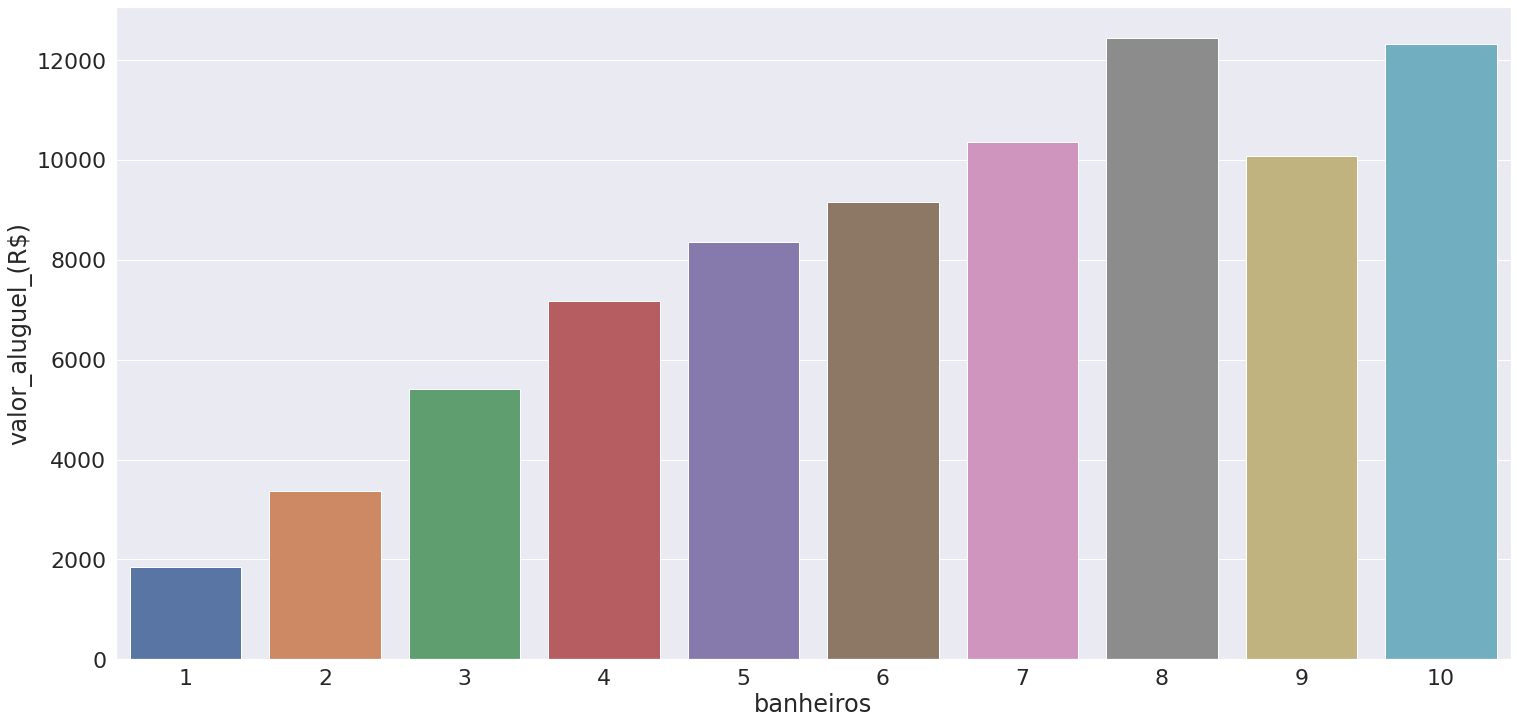

In [35]:
aux1_h3 = dados3[['banheiros', 'valor_aluguel_(R$)']].groupby('banheiros').mean().reset_index()
sns.barplot(x='banheiros', y='valor_aluguel_(R$)', data=aux1_h3)

Outra hipótese verdadeira. Residências com mais banheiros tem aluguel mais caro.

### H4. Residências com maior número de vagas para estacionamento são mais caras

<AxesSubplot:xlabel='numero_vagas', ylabel='valor_aluguel_(R$)'>

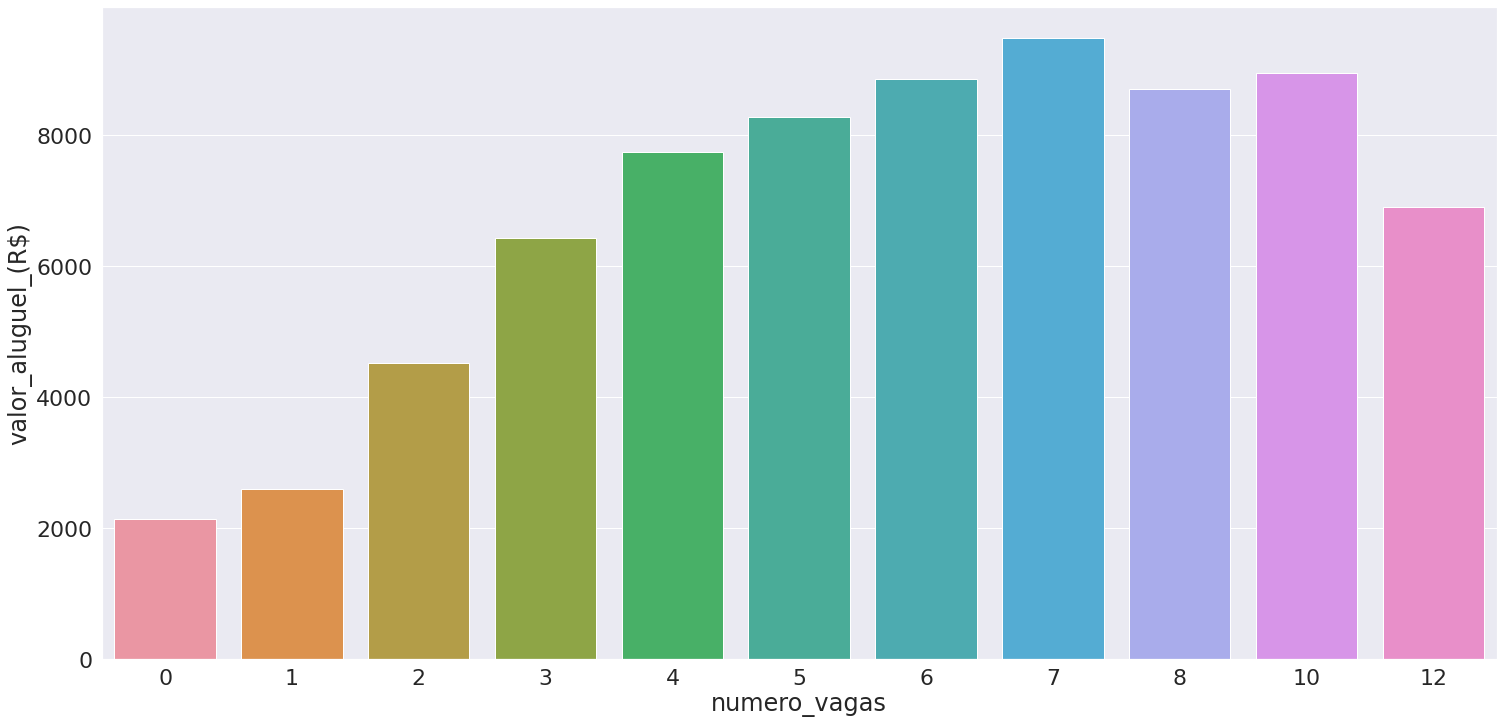

In [36]:
aux1_h4 = dados3[['numero_vagas', 'valor_aluguel_(R$)']].groupby('numero_vagas').mean().reset_index()
sns.barplot(x='numero_vagas', y='valor_aluguel_(R$)', data=aux1_h4)

Residências com mais vagas são mais caras. Hipótese verdadeira.

### H5. Residências mobilhadas são mais caras


<AxesSubplot:xlabel='mobilhada', ylabel='valor_aluguel_(R$)'>

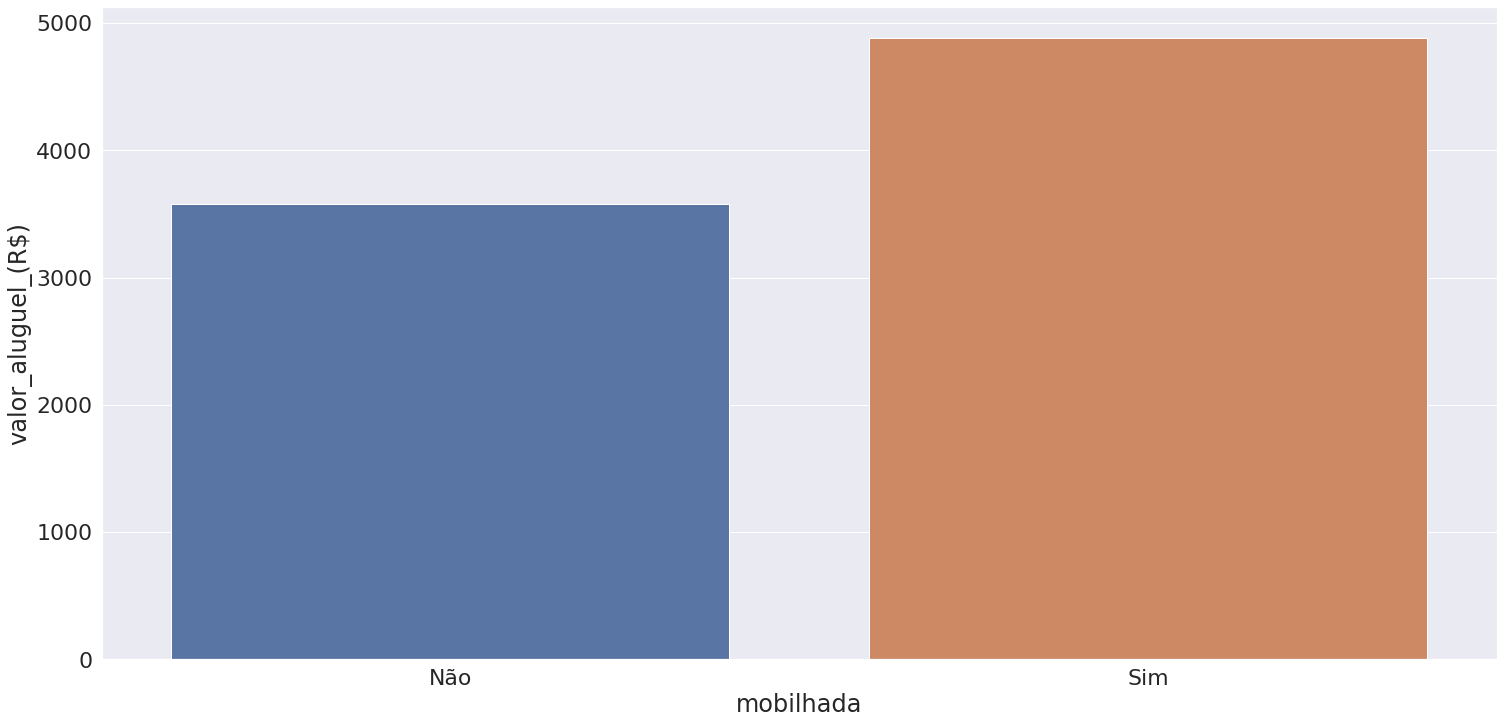

In [37]:
aux1_h5 = dados3[['mobilhada', 'valor_aluguel_(R$)']].groupby('mobilhada').mean().reset_index()
sns.barplot(x='mobilhada', y='valor_aluguel_(R$)', data=aux1_h5)

Residências mobilhadas são mais cara. Hipótese verdadeira.

## Análise multivariada

A análise multivariada ajuda a olhar quais variáveis que são correlacionadas.

### Atributos numéricos 

<AxesSubplot:>

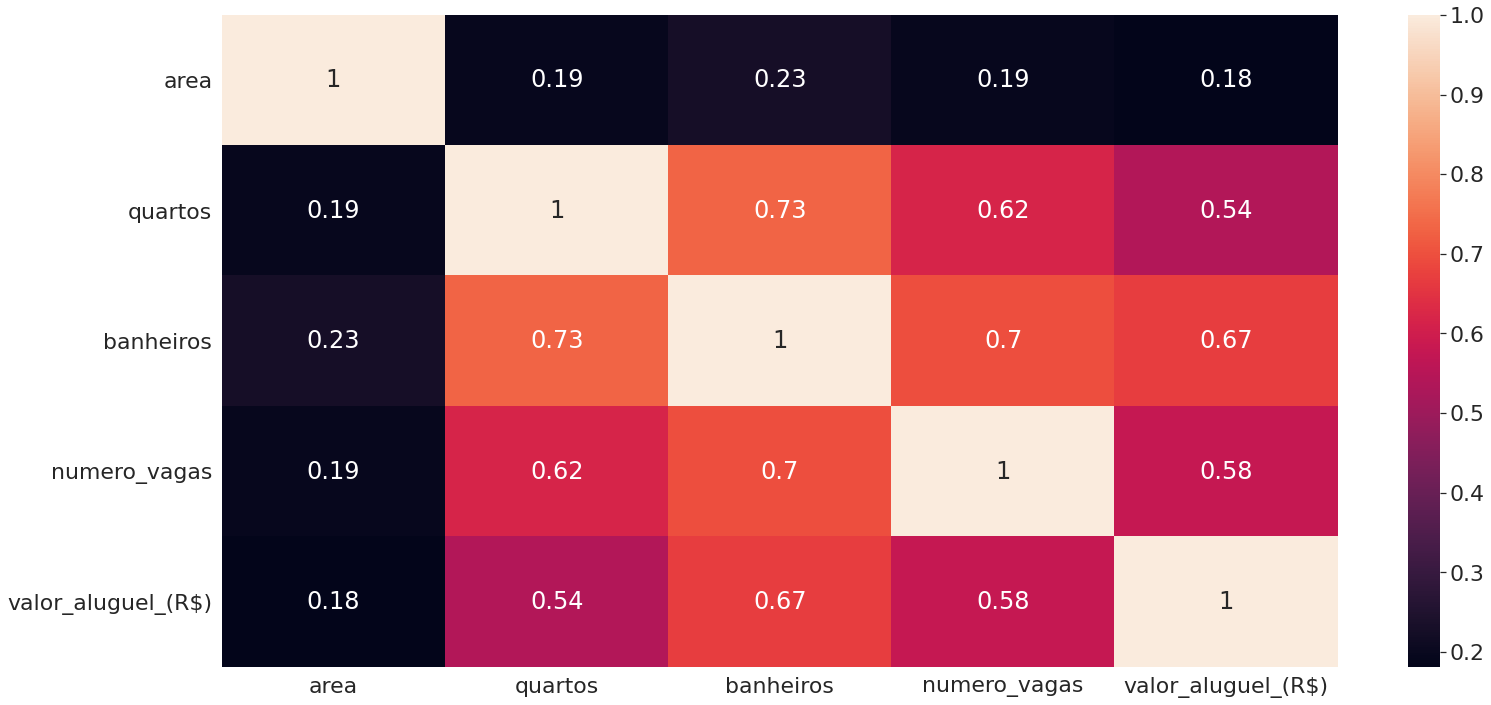

In [38]:
correlacao_numerica = atributos_numericos.corr(method='pearson')
sns.heatmap(correlacao_numerica, annot=True)

Vemos que a variável que mais interfere no valor do aluguel é o número de banheiros. A que menos interfere á a área. Porém todas as variáveis interferem positivamente, logo quanto maior cada variável, maior o valor do aluguel.

### Atributos categóricos

In [39]:
atributos_categoricos.head()

,cidade,andar,aceita_animais,mobilhada
0,São Paulo,7,Sim,Sim
1,São Paulo,20,Sim,Não
2,Porto Alegre,6,Sim,Não
3,Porto Alegre,2,Sim,Não
4,São Paulo,1,Não,Não


Vamos usar o método de correlação de Cramér's V para as variáveis categóricas.


$$V = \sqrt{\frac{X^2/n}{min(k-1, r-1)}}$$


In [40]:
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    
    kcorr = k - (k-1)**2 / (n-1)
    rcorr = r - (r-1)**2 / (n-1)
    
    return np.sqrt((chi2corr/n) / min(kcorr - 1, rcorr - 1))

In [41]:
atributos_categoricos.head()

,cidade,andar,aceita_animais,mobilhada
0,São Paulo,7,Sim,Sim
1,São Paulo,20,Sim,Não
2,Porto Alegre,6,Sim,Não
3,Porto Alegre,2,Sim,Não
4,São Paulo,1,Não,Não


In [42]:
# cidade
atr_cat_1 = cramer_v(atributos_categoricos['cidade'], atributos_categoricos['cidade'])
atr_cat_2 = cramer_v(atributos_categoricos['cidade'], atributos_categoricos['andar'])
atr_cat_3 = cramer_v(atributos_categoricos['cidade'], atributos_categoricos['aceita_animais'])
atr_cat_4 = cramer_v(atributos_categoricos['cidade'], atributos_categoricos['mobilhada'])

# andar
atr_cat_5 = cramer_v(atributos_categoricos['andar'], atributos_categoricos['cidade'])
atr_cat_6 = cramer_v(atributos_categoricos['andar'], atributos_categoricos['andar'])
atr_cat_7 = cramer_v(atributos_categoricos['andar'], atributos_categoricos['aceita_animais'])
atr_cat_8 = cramer_v(atributos_categoricos['andar'], atributos_categoricos['mobilhada'])

# aceita animais
atr_cat_9 = cramer_v(atributos_categoricos['aceita_animais'], atributos_categoricos['cidade'])
atr_cat_10 = cramer_v(atributos_categoricos['aceita_animais'], atributos_categoricos['andar'])
atr_cat_11 = cramer_v(atributos_categoricos['aceita_animais'], atributos_categoricos['aceita_animais'])
atr_cat_12 = cramer_v(atributos_categoricos['aceita_animais'], atributos_categoricos['mobilhada'])

# mobilhada
atr_cat_13 = cramer_v(atributos_categoricos['mobilhada'], atributos_categoricos['cidade'])
atr_cat_14 = cramer_v(atributos_categoricos['mobilhada'], atributos_categoricos['andar'])
atr_cat_15 = cramer_v(atributos_categoricos['mobilhada'], atributos_categoricos['aceita_animais'])
atr_cat_16 = cramer_v(atributos_categoricos['mobilhada'], atributos_categoricos['mobilhada'])

df_atr_cat = pd.DataFrame({'cidade': [atr_cat_1, atr_cat_2, atr_cat_3, atr_cat_4],
                           'andar': [atr_cat_5, atr_cat_6, atr_cat_7, atr_cat_8],
                           'aceita_animais': [atr_cat_9, atr_cat_10, atr_cat_11, atr_cat_12],
                           'mobilhada': [atr_cat_13, atr_cat_14, atr_cat_15, atr_cat_16]})
df_atr_cat = df_atr_cat.set_index(df_atr_cat.columns)
df_atr_cat

,cidade,andar,aceita_animais,mobilhada
cidade,1.000187,0.164030,0.074762,0.124109
andar,0.164030,1.001594,0.103754,0.165620
aceita_animais,0.074762,0.103754,0.999776,0.087714
mobilhada,0.124109,0.165620,0.087714,0.999793


<AxesSubplot:>

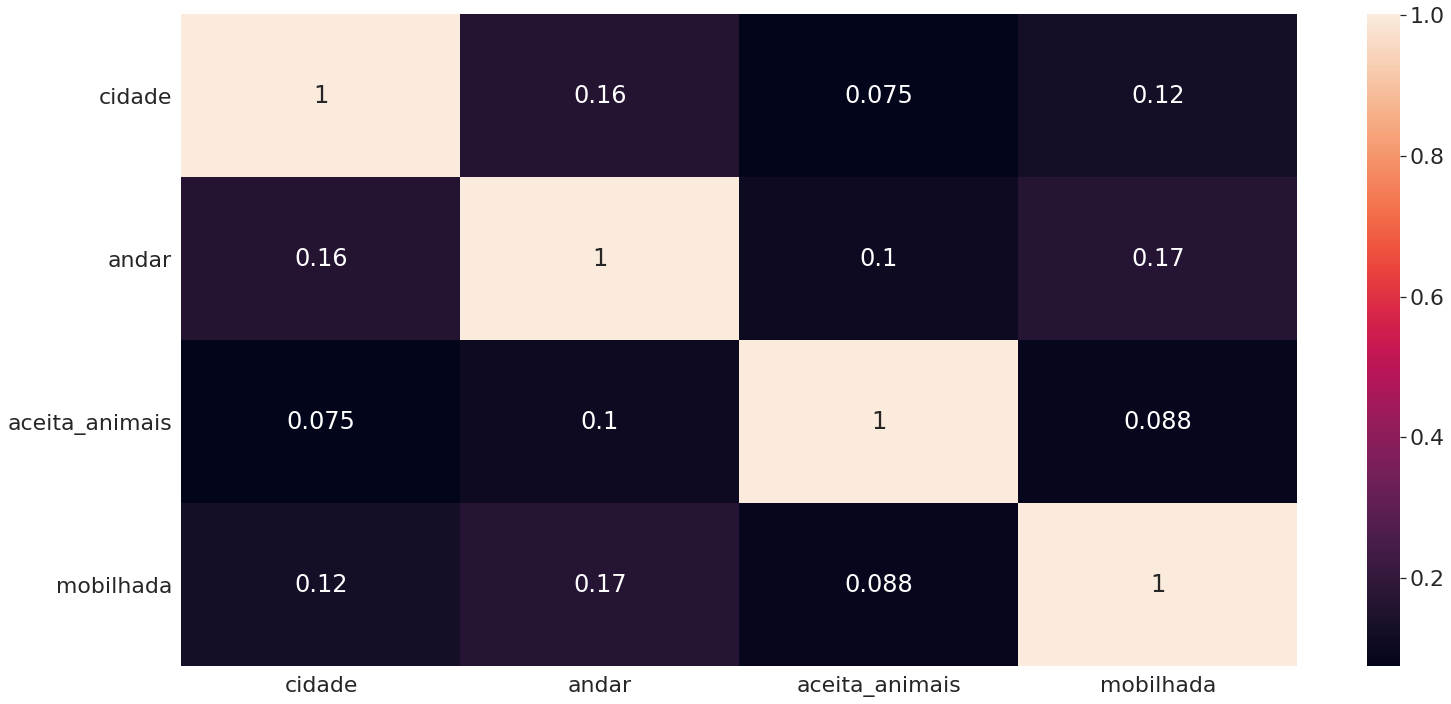

In [43]:
sns.heatmap(df_atr_cat, annot=True)

Vemos aqui que as variáveis categóricas possuem uma correlação positiva, porém a correlação é baixa, quase nula.

# Preparação dos dados

In [44]:
dados4 = dados3.copy()

In [45]:
atributos_categoricos.head(1)

,cidade,andar,aceita_animais,mobilhada
0,São Paulo,7,Sim,Sim


Realizaremos um encodign nas variáveis categóricas

In [46]:
# cidade
# usaremos o label enconder
LbEnconder = LabelEncoder()
dados4['cidade_lb'] = LbEnconder.fit_transform(dados4['cidade'])

# aceita animais
# usaremos a função map
dados4['aceita_animais_enc'] = dados4['aceita_animais'].map({'Sim': 1, 'Não': 0 })

# mobilhada
# usaremos a função map
dados4['mobilhada_enc'] = dados4['mobilhada'].map({'Sim': 1, 'Não': 0 })
dados4.head()

,cidade,area,quartos,banheiros,numero_vagas,andar,aceita_animais,mobilhada,valor_aluguel_(R$),area_categoria,cidade_lb,aceita_animais_enc,mobilhada_enc
0,São Paulo,70,2,1,1,7,Sim,Sim,3300,Abaixo da média,4,1,1
1,São Paulo,320,4,4,0,20,Sim,Não,4960,Acima da média,4,1,0
2,Porto Alegre,80,1,1,1,6,Sim,Não,2800,Abaixo da média,2,1,0
3,Porto Alegre,51,2,1,0,2,Sim,Não,1112,Abaixo da média,2,1,0
4,São Paulo,25,1,1,0,1,Não,Não,800,Abaixo da média,4,0,0


## Divisão dos dados em treino e teste

In [47]:
dados4.head(1)

,cidade,area,quartos,banheiros,numero_vagas,andar,aceita_animais,mobilhada,valor_aluguel_(R$),area_categoria,cidade_lb,aceita_animais_enc,mobilhada_enc
0,São Paulo,70,2,1,1,7,Sim,Sim,3300,Abaixo da média,4,1,1


In [48]:
x = dados4[['area', 'quartos', 'banheiros', 'numero_vagas', 'cidade_lb',
            'aceita_animais_enc', 'mobilhada_enc']]
x.head()

,area,quartos,banheiros,numero_vagas,cidade_lb,aceita_animais_enc,mobilhada_enc
0,70,2,1,1,4,1,1
1,320,4,4,0,4,1,0
2,80,1,1,1,2,1,0
3,51,2,1,0,2,1,0
4,25,1,1,0,4,0,0


In [49]:
y = dados4['valor_aluguel_(R$)']
y.head()

0    3300
1    4960
2    2800
3    1112
4     800
Name: valor_aluguel_(R$), dtype: int64

In [50]:
# divisão dos dados usando o train_test_split() do scikit-learn

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Estimando o modelo

## As features selecionadas são significativas?

Veremos se as features selecionadas são significativas para o modelo, faremos isso com testes estatísticos usando o statsmodels.

In [52]:
# adicionando a constante
x_train_constante = sm.add_constant(x_train)

# trainando o modelo OLS
modelo_statsmodels = sm.OLS(y_train, x_train_constante, hascont=True).fit()

modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     valor_aluguel_(R$)   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1158.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:01:36   Log-Likelihood:                -68848.
No. Observations:                7484   AIC:                         1.377e+05
Df Residuals:                    7476   BIC:                         1.378e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1186.7066    101.679    -11.671      0.000   -1386.026    -987.388
area                   0.0935      0.046      2.039      0.041       0.004       0.183
quartos              350.1287     36.960      9.473      0.000     277.677     422.581
banheiros           1037.6756     33.054     31.393      0.000     972.880    1102.471
numero_vagas         438.2056     24.820     17.656      0.000     389.552     486.859
cidade_lb            327.1472     19.677     16.626      0.000     288.574     365.720
aceita_animais_enc  -103.3586     67.726     -1.526      0.127    -236.121      29.404
mobilhada_enc       1229.9503     65.809     18.690      0.000    1100.946    1358.955
==============================================================================
Omnibus:                     3120.149   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32727.693
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                      12.659   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Com a tabela, conseguimos ver que a variável `aceita_animais_enc` não é tão significante para a regressão, por isso vamos excluir a variável.

In [53]:
x_train = x_train.drop('aceita_animais_enc', axis=1)
x_train.head()

,area,quartos,banheiros,numero_vagas,cidade_lb,mobilhada_enc
8204,140,4,3,4,0,0
7926,100,3,3,0,4,0
7756,189,3,4,3,4,0
2689,91,3,2,2,2,0
6161,48,2,1,1,4,1


In [54]:
x_test = x_test.drop('aceita_animais_enc', axis=1)
x_test.head()

,area,quartos,banheiros,numero_vagas,cidade_lb,mobilhada_enc
1964,134,3,3,2,1,0
5267,80,2,1,1,3,0
9630,80,2,2,1,1,1
5503,90,3,2,1,0,0
1683,300,4,2,0,4,0


## Estimando o modelo de regressão linear

In [55]:
modelo_regressao_linear = LinearRegression()

# treinando o modelo
modelo_regressao_linear.fit(x_train, y_train)

# previsões do modelo
valor_previsto = modelo_regressao_linear.predict(x_test)

# observando as métricas
mae = metrics.mean_absolute_error(y_test, valor_previsto)
mape = metrics.mean_absolute_percentage_error(y_test, valor_previsto) * 100
rmse = np.sqrt(metrics.mean_squared_error(y_test, valor_previsto))

# dataframe métricas
pd.DataFrame([mae, mape, rmse]).rename(index={0: 'MAE', 1: 'MAPE (%)',
                                                  2: 'RMSE'}, columns = {0: 'Métricas'}).round(2)

,Métricas
MAE,1529.75
MAPE (%),47.92
RMSE,2305.06


In [56]:
modelo_lasso = Lasso()

# treinando o modelo
modelo_lasso.fit(x_train, y_train)

# previsões do modelo
valor_previsto_lasso = modelo_lasso.predict(x_test)

# observando as métricas
mae = metrics.mean_absolute_error(y_test, valor_previsto_lasso)
mape = metrics.mean_absolute_percentage_error(y_test, valor_previsto_lasso) * 100
rmse = np.sqrt(metrics.mean_squared_error(y_test, valor_previsto_lasso))

# dataframe métricas
pd.DataFrame([mae, mape, rmse]).rename(index={0: 'MAE', 1: 'MAPE (%)',
                                                  2: 'RMSE'}, columns = {0: 'Métricas'}).round(2)

,Métricas
MAE,1529.65
MAPE (%),47.92
RMSE,2305.01


In [57]:
modelo_random_forest = RandomForestRegressor()

# treinando o modelo
modelo_random_forest.fit(x_train, y_train)

# previsões do modelo
valor_previsto_random = modelo_random_forest.predict(x_test)

# observando as métricas
mae = metrics.mean_absolute_error(y_test, valor_previsto_random)
mape = metrics.mean_absolute_percentage_error(y_test, valor_previsto_random) * 100
rmse = np.sqrt(metrics.mean_squared_error(y_test, valor_previsto_random))

# dataframe métricas
pd.DataFrame([mae, mape, rmse]).rename(index={0: 'MAE', 1: 'MAPE (%)',
                                                  2: 'RMSE'}, columns = {0: 'Métricas'}).round(2)

,Métricas
MAE,1441.85
MAPE (%),41.69
RMSE,2314.80


# Previsão

In [58]:
x_test.head(1)

,area,quartos,banheiros,numero_vagas,cidade_lb,mobilhada_enc
1964,134,3,3,2,1,0


In [59]:
area = 360
quartos = 3
banheiros = 2
numero_vagas = 3
cidade_lb = 3
mobilhada_enc = 1

entrada = [[area, quartos, banheiros, numero_vagas, cidade_lb, mobilhada_enc]]

valor_imovel = modelo_random_forest.predict(entrada).round(2)[0]

print(f'O preço de aluguel de uma casa com essas características é de R$ {valor_imovel}')

O preço de aluguel de uma casa com essas características é de R$ 12014.56


In [60]:
modelo_random_forest.score(x_train, y_train)

0.894504826419725

In [61]:
modelo_random_forest.score(x_test, y_test)

0.506611380831903